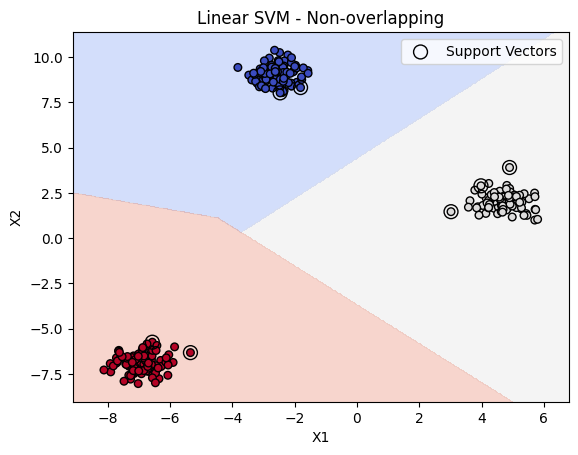

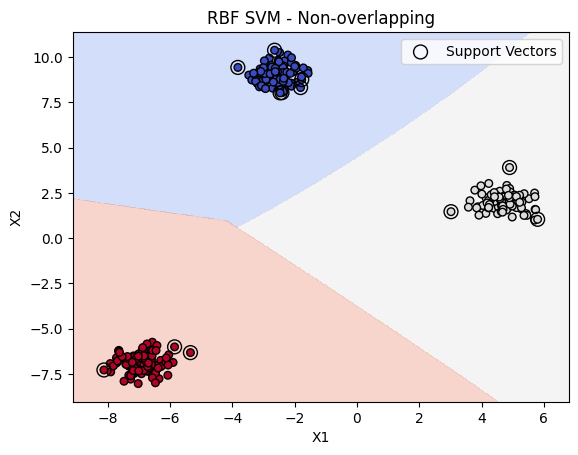

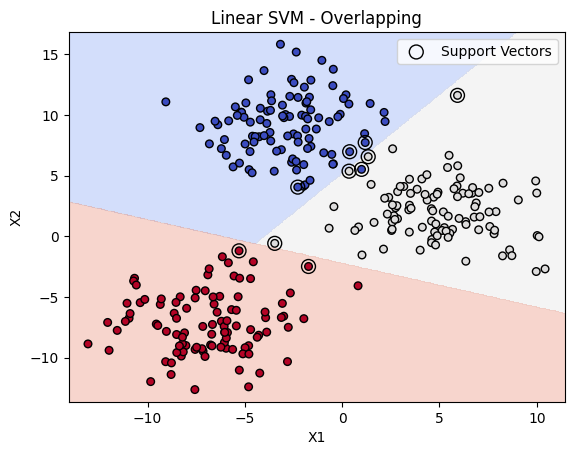

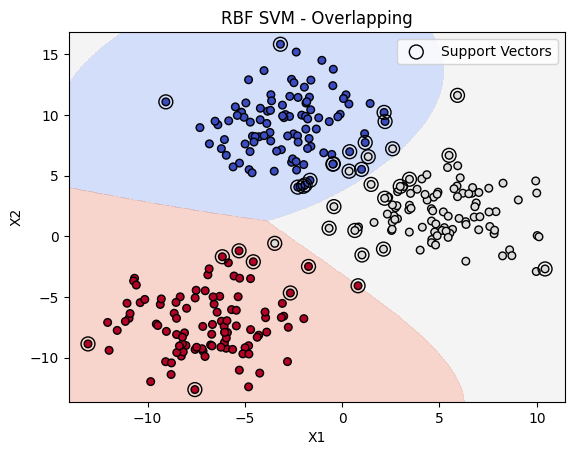

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

def plot_svm_with_boundaries(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(-0.5, 3, 1), cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')

    # Add boundary lines by contouring the decision function
    if hasattr(clf, "decision_function"):
        if len(np.unique(y)) == 2:
            # For binary classification, decision_function returns 1D array
            Z_dec = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z_dec = Z_dec.reshape(xx.shape)
            plt.contour(xx, yy, Z_dec, levels=[0], colors='k', linestyles='--')
        else:
            # For multiclass, use decision_function shape (n_samples, n_classes)
            # Plot boundaries between classes by checking where predicted classes change
            from matplotlib.colors import ListedColormap
            boundaries = []
            for i in range(3):
                for j in range(i+1, 3):
                    # Calculate difference between decision functions for classes i and j
                    dec = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
                    dec_diff = dec[:, i] - dec[:, j]
                    dec_diff = dec_diff.reshape(xx.shape)
                    plt.contour(xx, yy, dec_diff, levels=[0], colors='k', linestyles='--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', label='Support Vectors')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()


# Generate Non-overlapping dataset
X_nonoverlap, y_nonoverlap = make_blobs(n_samples=300, centers=3,
                                       cluster_std=0.5, random_state=42)

# Generate Overlapping dataset
X_overlap, y_overlap = make_blobs(n_samples=300, centers=3,
                                 cluster_std=2.5, random_state=42)

# Linear SVM on Non-overlapping
clf_linear_non = SVC(kernel='linear')
clf_linear_non.fit(X_nonoverlap, y_nonoverlap)
plot_svm(clf_linear_non, X_nonoverlap, y_nonoverlap, 'Linear SVM - Non-overlapping')

# RBF SVM on Non-overlapping
clf_rbf_non = SVC(kernel='rbf', gamma='scale')
clf_rbf_non.fit(X_nonoverlap, y_nonoverlap)
plot_svm(clf_rbf_non, X_nonoverlap, y_nonoverlap, 'RBF SVM - Non-overlapping')

# Linear SVM on Overlapping
clf_linear_ov = SVC(kernel='linear')
clf_linear_ov.fit(X_overlap, y_overlap)
plot_svm(clf_linear_ov, X_overlap, y_overlap, 'Linear SVM - Overlapping')

# RBF SVM on Overlapping
clf_rbf_ov = SVC(kernel='rbf', gamma='scale')
clf_rbf_ov.fit(X_overlap, y_overlap)
plot_svm(clf_rbf_ov, X_overlap, y_overlap, 'RBF SVM - Overlapping')


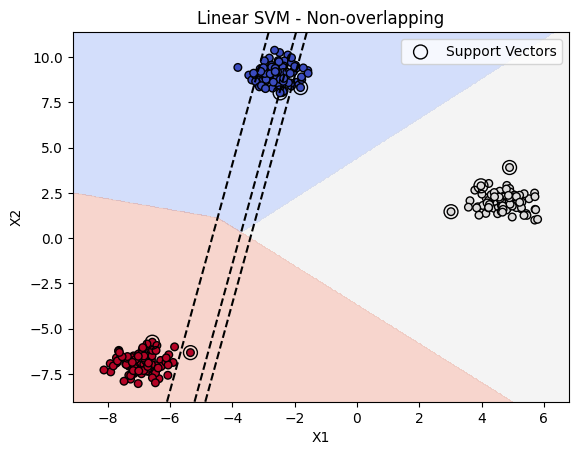

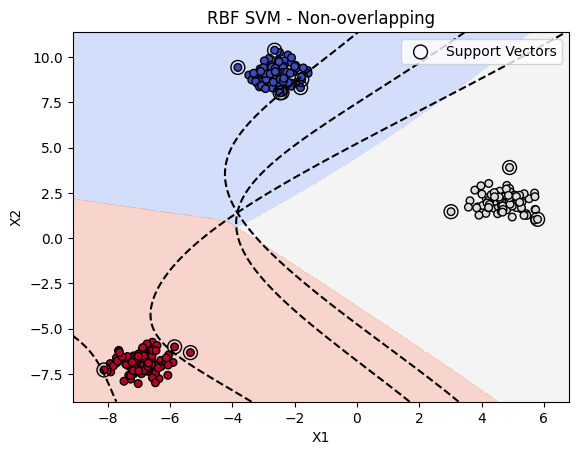

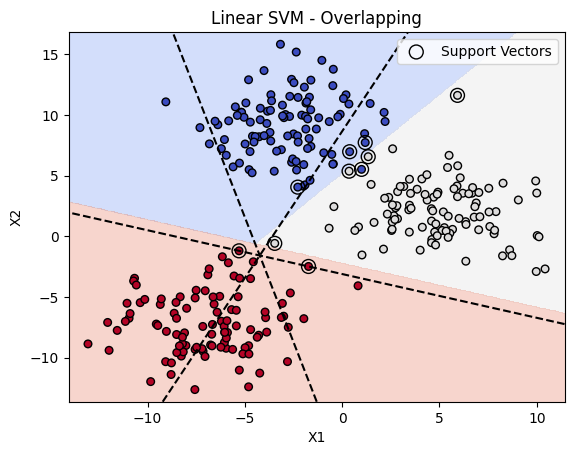

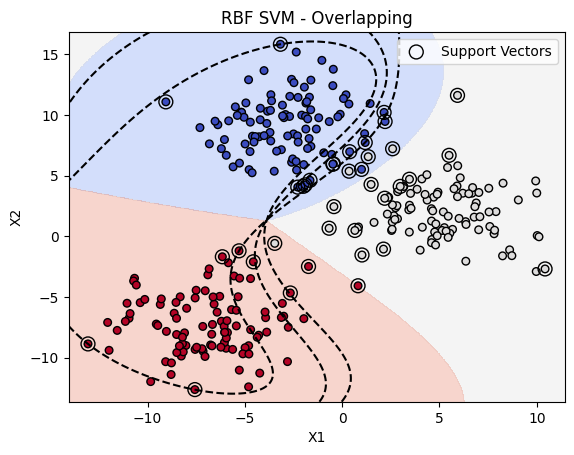

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

def plot_svm_boundaries(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    # Predict classes for each point in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot filled decision regions
    plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(-0.5, 3, 1), cmap=plt.cm.coolwarm)
    
    # Scatter plot of points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')

    # Plot support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', label='Support Vectors')

    # For multiclass, plot decision boundaries between each pair of classes
    if hasattr(clf, "decision_function"):
        dec = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        if dec.ndim == 2:  # multiclass case
            # One-vs-one decision boundaries: between every pair of classes
            for i in range(dec.shape[1]):
                for j in range(i+1, dec.shape[1]):
                    diff = dec[:, i] - dec[:, j]
                    diff = diff.reshape(xx.shape)
                    plt.contour(xx, yy, diff, levels=[0], colors='k', linestyles='--')

    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()


# Generate datasets
X_nonoverlap, y_nonoverlap = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=42)
X_overlap, y_overlap = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=42)

# Train and plot Linear SVM Non-overlapping
clf_linear_non = SVC(kernel='linear', decision_function_shape='ovo')
clf_linear_non.fit(X_nonoverlap, y_nonoverlap)
plot_svm_boundaries(clf_linear_non, X_nonoverlap, y_nonoverlap, "Linear SVM - Non-overlapping")

# Train and plot RBF SVM Non-overlapping
clf_rbf_non = SVC(kernel='rbf', gamma='scale', decision_function_shape='ovo')
clf_rbf_non.fit(X_nonoverlap, y_nonoverlap)
plot_svm_boundaries(clf_rbf_non, X_nonoverlap, y_nonoverlap, "RBF SVM - Non-overlapping")

# Train and plot Linear SVM Overlapping
clf_linear_ov = SVC(kernel='linear', decision_function_shape='ovo')
clf_linear_ov.fit(X_overlap, y_overlap)
plot_svm_boundaries(clf_linear_ov, X_overlap, y_overlap, "Linear SVM - Overlapping")

# Train and plot RBF SVM Overlapping
clf_rbf_ov = SVC(kernel='rbf', gamma='scale', decision_function_shape='ovo')
clf_rbf_ov.fit(X_overlap, y_overlap)
plot_svm_boundaries(clf_rbf_ov, X_overlap, y_overlap, "RBF SVM - Overlapping")


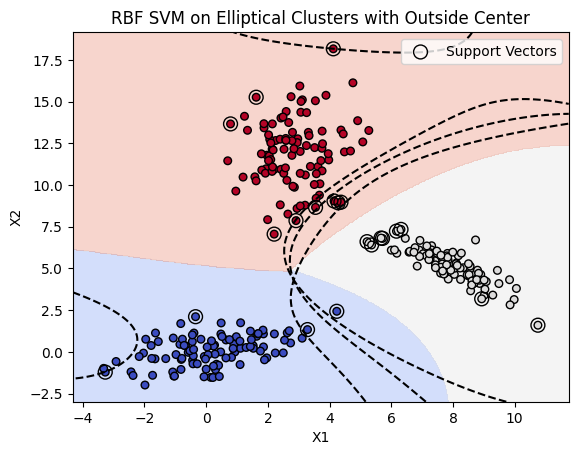

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

np.random.seed(42)

# Parameters for 3 elliptical clusters: mean and covariance
clusters = [
    {'mean': [0, 0], 'cov': [[3, 1], [1, 1]], 'size': 100},
    {'mean': [8, 5], 'cov': [[1, -0.8], [-0.8, 1]], 'size': 100},
    {'mean': [3, 12], 'cov': [[1, 0], [0, 4]], 'size': 100}  # "center outside" top area
]

X = []
y = []
for i, c in enumerate(clusters):
    points = np.random.multivariate_normal(c['mean'], c['cov'], c['size'])
    X.append(points)
    y.append(np.full(c['size'], i))

X = np.vstack(X)
y = np.hstack(y)

# Plot function from before (slightly adapted)
def plot_svm_boundaries(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(-0.5, 3, 1), cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', label='Support Vectors')

    # Decision boundaries for multiclass
    if hasattr(clf, "decision_function"):
        dec = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        if dec.ndim == 2:
            for i in range(dec.shape[1]):
                for j in range(i+1, dec.shape[1]):
                    diff = dec[:, i] - dec[:, j]
                    diff = diff.reshape(xx.shape)
                    plt.contour(xx, yy, diff, levels=[0], colors='k', linestyles='--')

    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

# Train SVM with RBF kernel (good for nonlinear boundaries)
clf_rbf = SVC(kernel='rbf', gamma='scale', decision_function_shape='ovo')
clf_rbf.fit(X, y)

plot_svm_boundaries(clf_rbf, X, y, "RBF SVM on Elliptical Clusters with Outside Center")


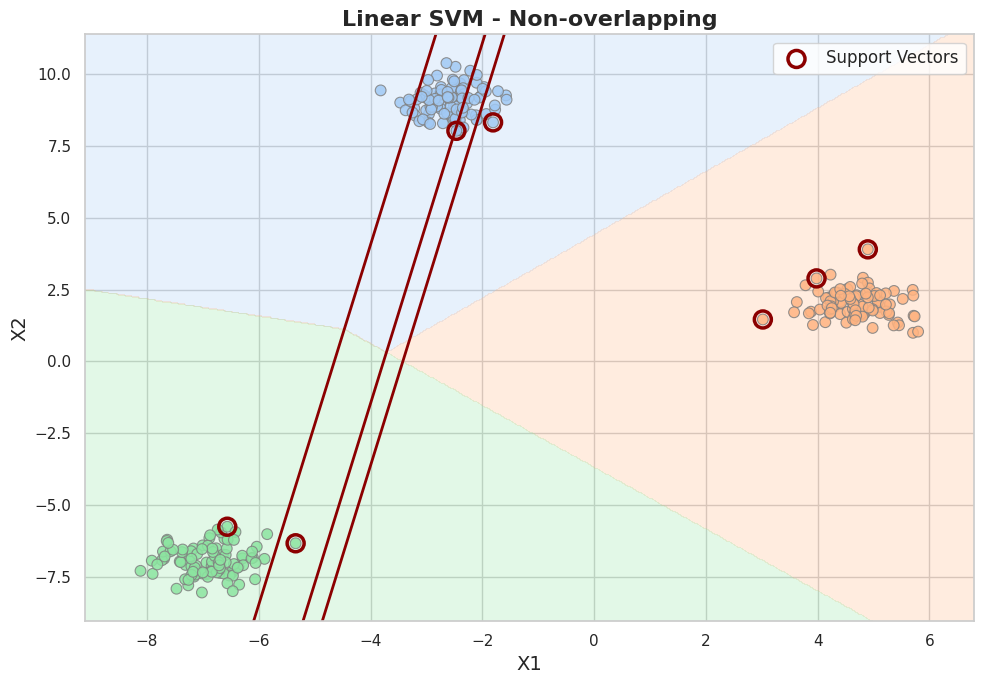

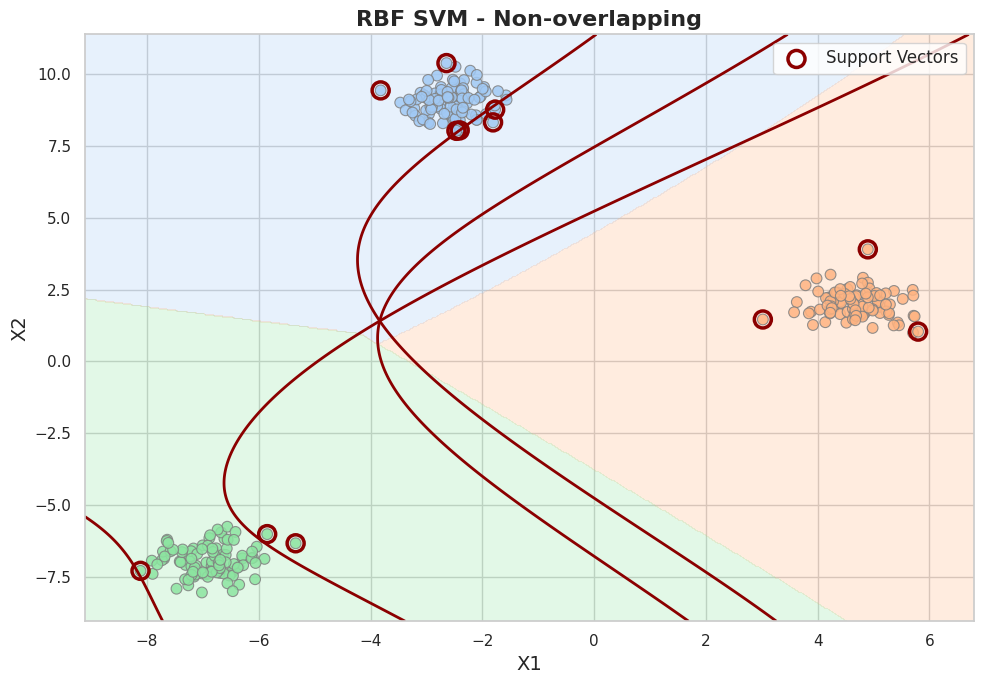

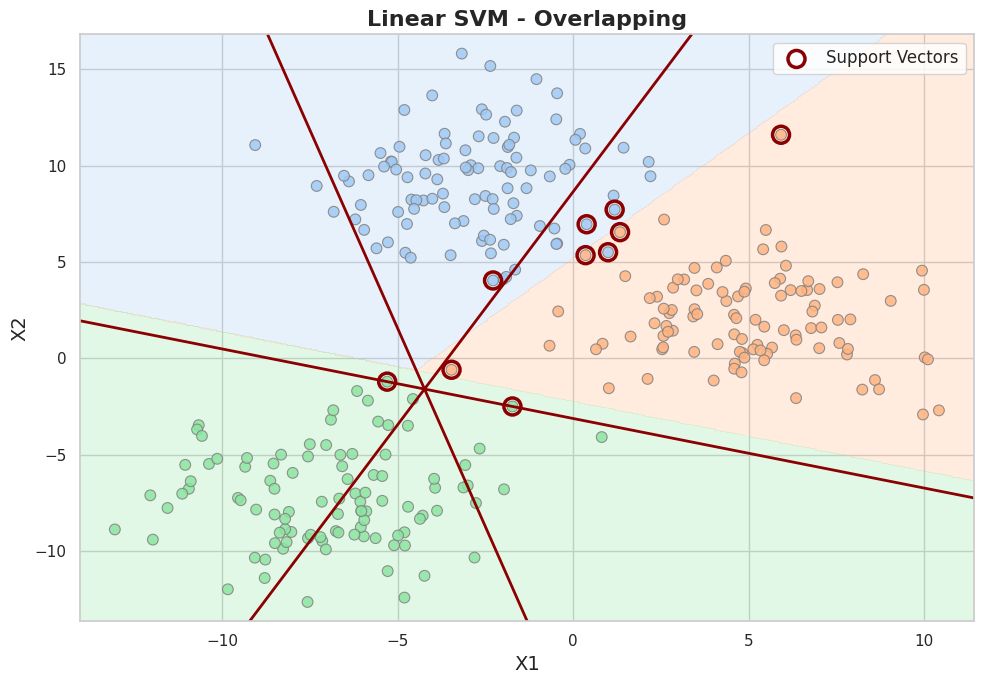

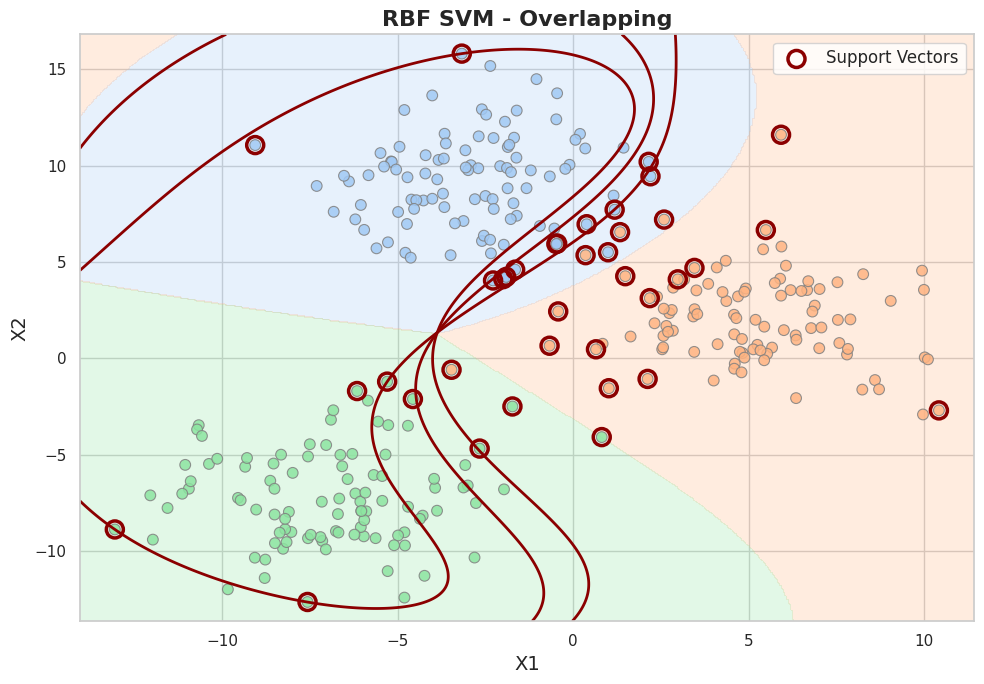

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import seaborn as sns
from matplotlib.colors import ListedColormap

def plot_svm_boundaries_improved(clf, X, y, title):
    # Set seaborn style for nicer background and font
    sns.set(style="whitegrid", palette="pastel")

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Predict classes on grid points
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Pastel colormap for 3 classes
    colors = sns.color_palette("pastel", 3)
    cmap = ListedColormap(colors)

    plt.figure(figsize=(10, 7))

    # Plot decision region with transparency
    plt.contourf(xx, yy, Z, alpha=0.25, levels=np.arange(-0.5, 3, 1), cmap=cmap)

    # Scatter plot of data points with gray edges
    plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=cmap, edgecolors='gray', linewidth=0.8, alpha=0.85)

    # Highlight support vectors with big hollow red circles
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=150, facecolors='none', edgecolors='darkred', linewidth=2.5, label='Support Vectors')

    # Plot decision boundaries between classes as solid dark red lines
    if hasattr(clf, "decision_function"):
        dec = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        if dec.ndim == 2:
            for i in range(dec.shape[1]):
                for j in range(i+1, dec.shape[1]):
                    diff = dec[:, i] - dec[:, j]
                    diff = diff.reshape(xx.shape)
                    plt.contour(xx, yy, diff, levels=[0], colors='darkred', linewidths=2)

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('X1', fontsize=14)
    plt.ylabel('X2', fontsize=14)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


# Generate toy datasets
X_nonoverlap, y_nonoverlap = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=42)
X_overlap, y_overlap = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=42)

# Linear SVM on non-overlapping data
clf_linear_non = SVC(kernel='linear', decision_function_shape='ovo')
clf_linear_non.fit(X_nonoverlap, y_nonoverlap)
plot_svm_boundaries_improved(clf_linear_non, X_nonoverlap, y_nonoverlap, "Linear SVM - Non-overlapping")

# RBF SVM on non-overlapping data
clf_rbf_non = SVC(kernel='rbf', gamma='scale', decision_function_shape='ovo')
clf_rbf_non.fit(X_nonoverlap, y_nonoverlap)
plot_svm_boundaries_improved(clf_rbf_non, X_nonoverlap, y_nonoverlap, "RBF SVM - Non-overlapping")

# Linear SVM on overlapping data
clf_linear_ov = SVC(kernel='linear', decision_function_shape='ovo')
clf_linear_ov.fit(X_overlap, y_overlap)
plot_svm_boundaries_improved(clf_linear_ov, X_overlap, y_overlap, "Linear SVM - Overlapping")

# RBF SVM on overlapping data
clf_rbf_ov = SVC(kernel='rbf', gamma='scale', decision_function_shape='ovo')
clf_rbf_ov.fit(X_overlap, y_overlap)
plot_svm_boundaries_improved(clf_rbf_ov, X_overlap, y_overlap, "RBF SVM - Overlapping")
